In [1]:
import numpy as np
import pandas as pd

In [2]:
team = pd.read_csv("../data/fbref/team.csv")
team_opp = pd.read_csv("../data/fbref/team_opp.csv")

In [3]:
team = team.loc[team.season == 2021]
team_opp = team_opp.loc[team_opp.season == 2021]

In [4]:
team_ids = {
    1: 'Arsenal',
    2: 'Aston Villa',
    3: 'Brentford',
    4: 'Brighton',
    5: 'Burnley',
    6: 'Chelsea',
    7: 'Crystal Palace',
    8: 'Everton',
    9: 'Leicester City',
    10: 'Leeds United',
    11: 'Liverpool',
    12: 'Manchester City',
    13: 'Manchester Utd',
    14: 'Newcastle Utd',
    15: 'Norwich City',
    16: 'Southampton',
    17: 'Tottenham',
    18: 'Watford',
    19: 'West Ham',
    20: 'Wolves'}

In [5]:
team['xGA'] = team['xGA'] / team['MP']
team = team[['Squad', 'xG', 'xGA', 'Per 90 Minutes xG', 'Per 90 Minutes npxG', 'Performance CS%']]
team_opp = team_opp[['Squad', 'Per 90 Minutes xG', 'Per 90 Minutes npxG']]

In [6]:
fixtures = pd.read_csv("../data/fpl_official/vaastav/data/2021-22/fixtures.csv")
fixtures = fixtures.loc[fixtures.finished == False]
fixtures = fixtures[["event", "team_a", "team_h"]].dropna()
fixtures["home"] = fixtures.team_h.map(team_ids)
fixtures["away"] = fixtures.team_a.map(team_ids)

In [7]:
table = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)
table_xga = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)
table_xg = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)
table_cs = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)

for t in team.Squad:
    for col in fixtures.event.unique()[:5]:
        if len(fixtures.loc[(fixtures.event == int(col)) & (fixtures.home == t)]):
            table.loc[t, int(col)] = fixtures.loc[
                (fixtures.event == int(col)) &
                (fixtures.home == t)].away.values[0]
            table_xga.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.home == t)].away.values[0]
                    ]["xGA"].values[0]
            table_xg.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.home == t)].away.values[0]
                    ]["Per 90 Minutes xG"].values[0]
            table_cs.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.home == t)].away.values[0]
                    ]["Performance CS%"].values[0]

        else:
            table.loc[t, int(col)] = fixtures.loc[
                (fixtures.event == int(col)) &
                (fixtures.away == t)].home.values[0]
            table_xga.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.away == t)].home.values[0]
                    ]["xGA"].values[0]
            table_xg.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.away == t)].home.values[0]
                    ]["Per 90 Minutes xG"].values[0]
            table_cs.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.away == t)].home.values[0]
                    ]["Performance CS%"].values[0]

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from highlight_text import fig_text
mpl.rcParams['figure.dpi'] = 400

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

In [9]:
from matplotlib.colors import ListedColormap

N = 2560

green = np.ones((N, 4))
green[:, 0] = np.linspace(37/256, 1, N)
green[:, 1] = np.linspace(156/256, 1, N)
green[:, 2] = np.linspace(88/256, 1, N)
green_cmp = ListedColormap(green)

red = np.ones((N, 4))
red[:, 0] = np.linspace(184/256, 1, N)
red[:, 1] = np.linspace(42/256, 1, N)
red[:, 2] = np.linspace(42/256, 1, N)
red_cmp = ListedColormap(red)

green2red = ListedColormap(
    np.vstack((
        green_cmp(np.linspace(0, 1, 128)),
        red_cmp(np.linspace(1, 0, 128)))),
        name='green2red')
red2green = ListedColormap(
    np.vstack((
        red_cmp(np.linspace(1, 0, 128)),
        green_cmp(np.linspace(0, 1, 128)))),
        name='red2green')

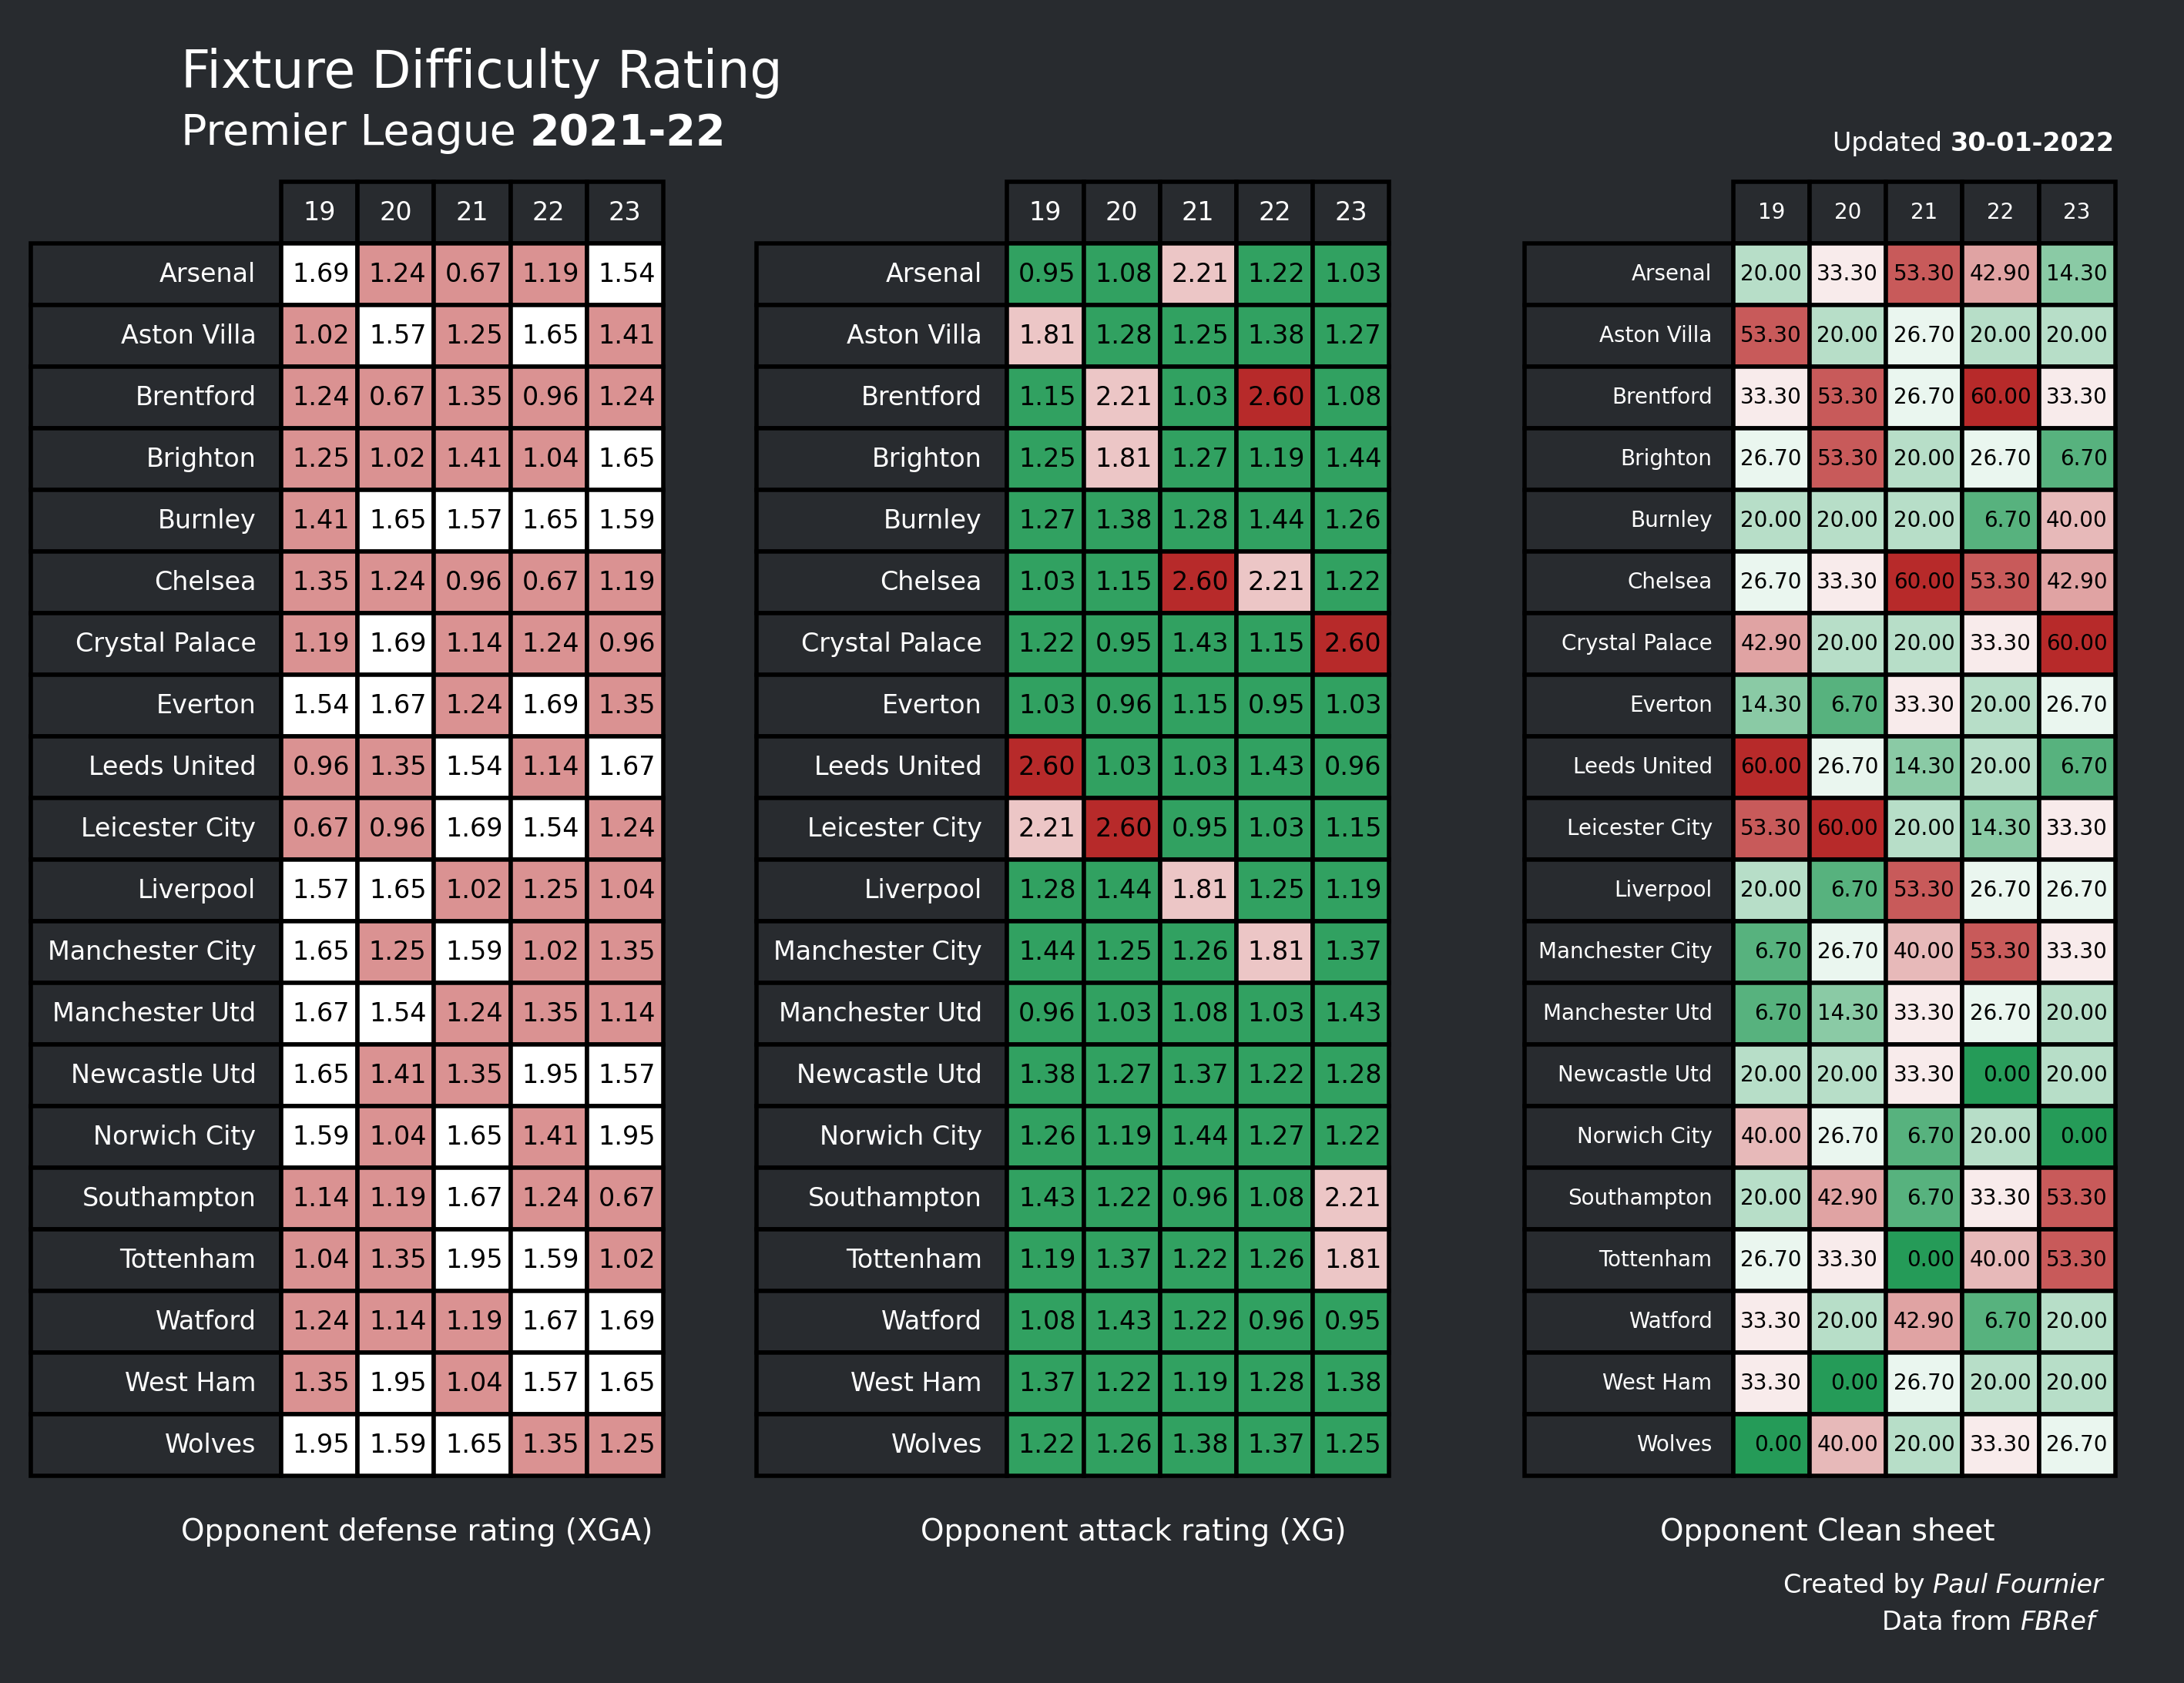

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

column_headers = table_cs.columns
row_headers = table_cs.index

background_rgb = [40/255, 43/255, 47/255, 1]
ccolors = np.repeat([background_rgb], len(column_headers), 0)
rcolors = np.repeat([background_rgb], len(row_headers), 0)

cell_text = []
for row in table_xga.values:
    cell_text.append([f'{x:1.2f}' for x in row])

norm = plt.Normalize(table_xga.values.min(), table_xga.values.max())
table_xga = table_xga.astype('float32')
colours = red2green(norm(np.around(table_xga.values)))

the_table = ax.table(
    cellText=cell_text,
    cellColours=colours,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center left',
    colWidths=[.04]*20,
    fontsize=12,
    )
the_table.scale(1, 1.2)

for i in range(1, 21):
    for j in range(0, 5):
        the_table[(i, j)].get_text().set_color('black')

cell_text = []
for row in table_xg.values:
    cell_text.append([f'{x:1.2f}' for x in row])

norm = plt.Normalize(table_xg.values.min(), table_xg.values.max())
table_xg = table_xg.astype('float32')
colours = green2red(norm(np.around(table_xg.values)))

the_table = ax.table(
    cellText=cell_text,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center',
    colWidths=[.04]*20,
    fontsize=12,
    cellColours=colours
    )
the_table.scale(1, 1.2)

for i in range(1, 21):
    for j in range(0, 5):
        the_table[(i, j)].get_text().set_color('black')

cell_text = []
for row in table_cs.values:
    cell_text.append([f'{x:1.2f}' for x in row])

norm = plt.Normalize(table_cs.values.min(), table_cs.values.max())
table_cs = table_cs.astype('float32')
colours = green2red(norm(np.around(table_cs.values)))

the_table = ax.table(
    cellText=cell_text,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center right',
    colWidths=[.04]*20,
    fontsize=12,
    cellColours=colours
    )
the_table.scale(1, 1.2)

for i in range(1, 21):
    for j in range(0, 5):
        the_table[(i, j)].get_text().set_color('black')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

fig_text(
    x=0.1, y=0.13,
    s="Opponent defense rating (XGA)",
    fontsize=7, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.4, y=0.13,
    s="Opponent attack rating (XG)",
    fontsize=7, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.7, y=0.13,
    s="Opponent Clean sheet",
    fontsize=7, fontfamily=watermark_font, color=text_color)

fig_text(
    x=0.1, y=0.925,
    s="Fixture Difficulty Rating",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=0.89,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.77, y=0.88,
    s="Updated <30-01-2022>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.75, y=0.1,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

fig_text(
    x=0.79, y=0.08,
    s="Data from <FBRef>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

#### FiveThirtyEight

In [11]:
spis = pd.read_csv('../data/fivethirtyeight/spi_global_rankings.csv')[['name', 'off', 'def', 'spi']]
spis = spis.replace(
    {
        "Brighton and Hove Albion": "Brighton",
        "Manchester United": "Manchester Utd",
        "Newcastle": "Newcastle Utd",
        "Tottenham Hotspur": "Tottenham",
        "West Ham United": "West Ham",
        "Wolverhampton": "Wolves"
    }
)

team = pd.merge(
    team,
    spis,
    left_on='Squad',
    right_on='name')

In [12]:
table = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)
table_off = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)
table_def = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)
table_spi = pd.DataFrame(
    columns=[int(col) for col in fixtures.event.unique()[:5]],
    index=team.Squad)

for t in team.Squad:
    for col in fixtures.event.unique()[:5]:
        if len(fixtures.loc[(fixtures.event == int(col)) & (fixtures.home == t)]):
            table.loc[t, int(col)] = fixtures.loc[
                (fixtures.event == int(col)) &
                (fixtures.home == t)].away.values[0]
            table_off.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.home == t)].away.values[0]
                    ]["off"].values[0]
            table_def.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.home == t)].away.values[0]
                    ]["def"].values[0]
            table_spi.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.home == t)].away.values[0]
                    ]["spi"].values[0]

        else:
            table.loc[t, int(col)] = fixtures.loc[
                (fixtures.event == int(col)) &
                (fixtures.away == t)].home.values[0]
            table_off.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.away == t)].home.values[0]
                    ]["off"].values[0]
            table_def.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.away == t)].home.values[0]
                    ]["def"].values[0]
            table_spi.loc[t, int(col)] = team.loc[
                team.Squad == fixtures.loc[
                    (fixtures.event == int(col)) &
                    (fixtures.away == t)].home.values[0]
                    ]["spi"].values[0]

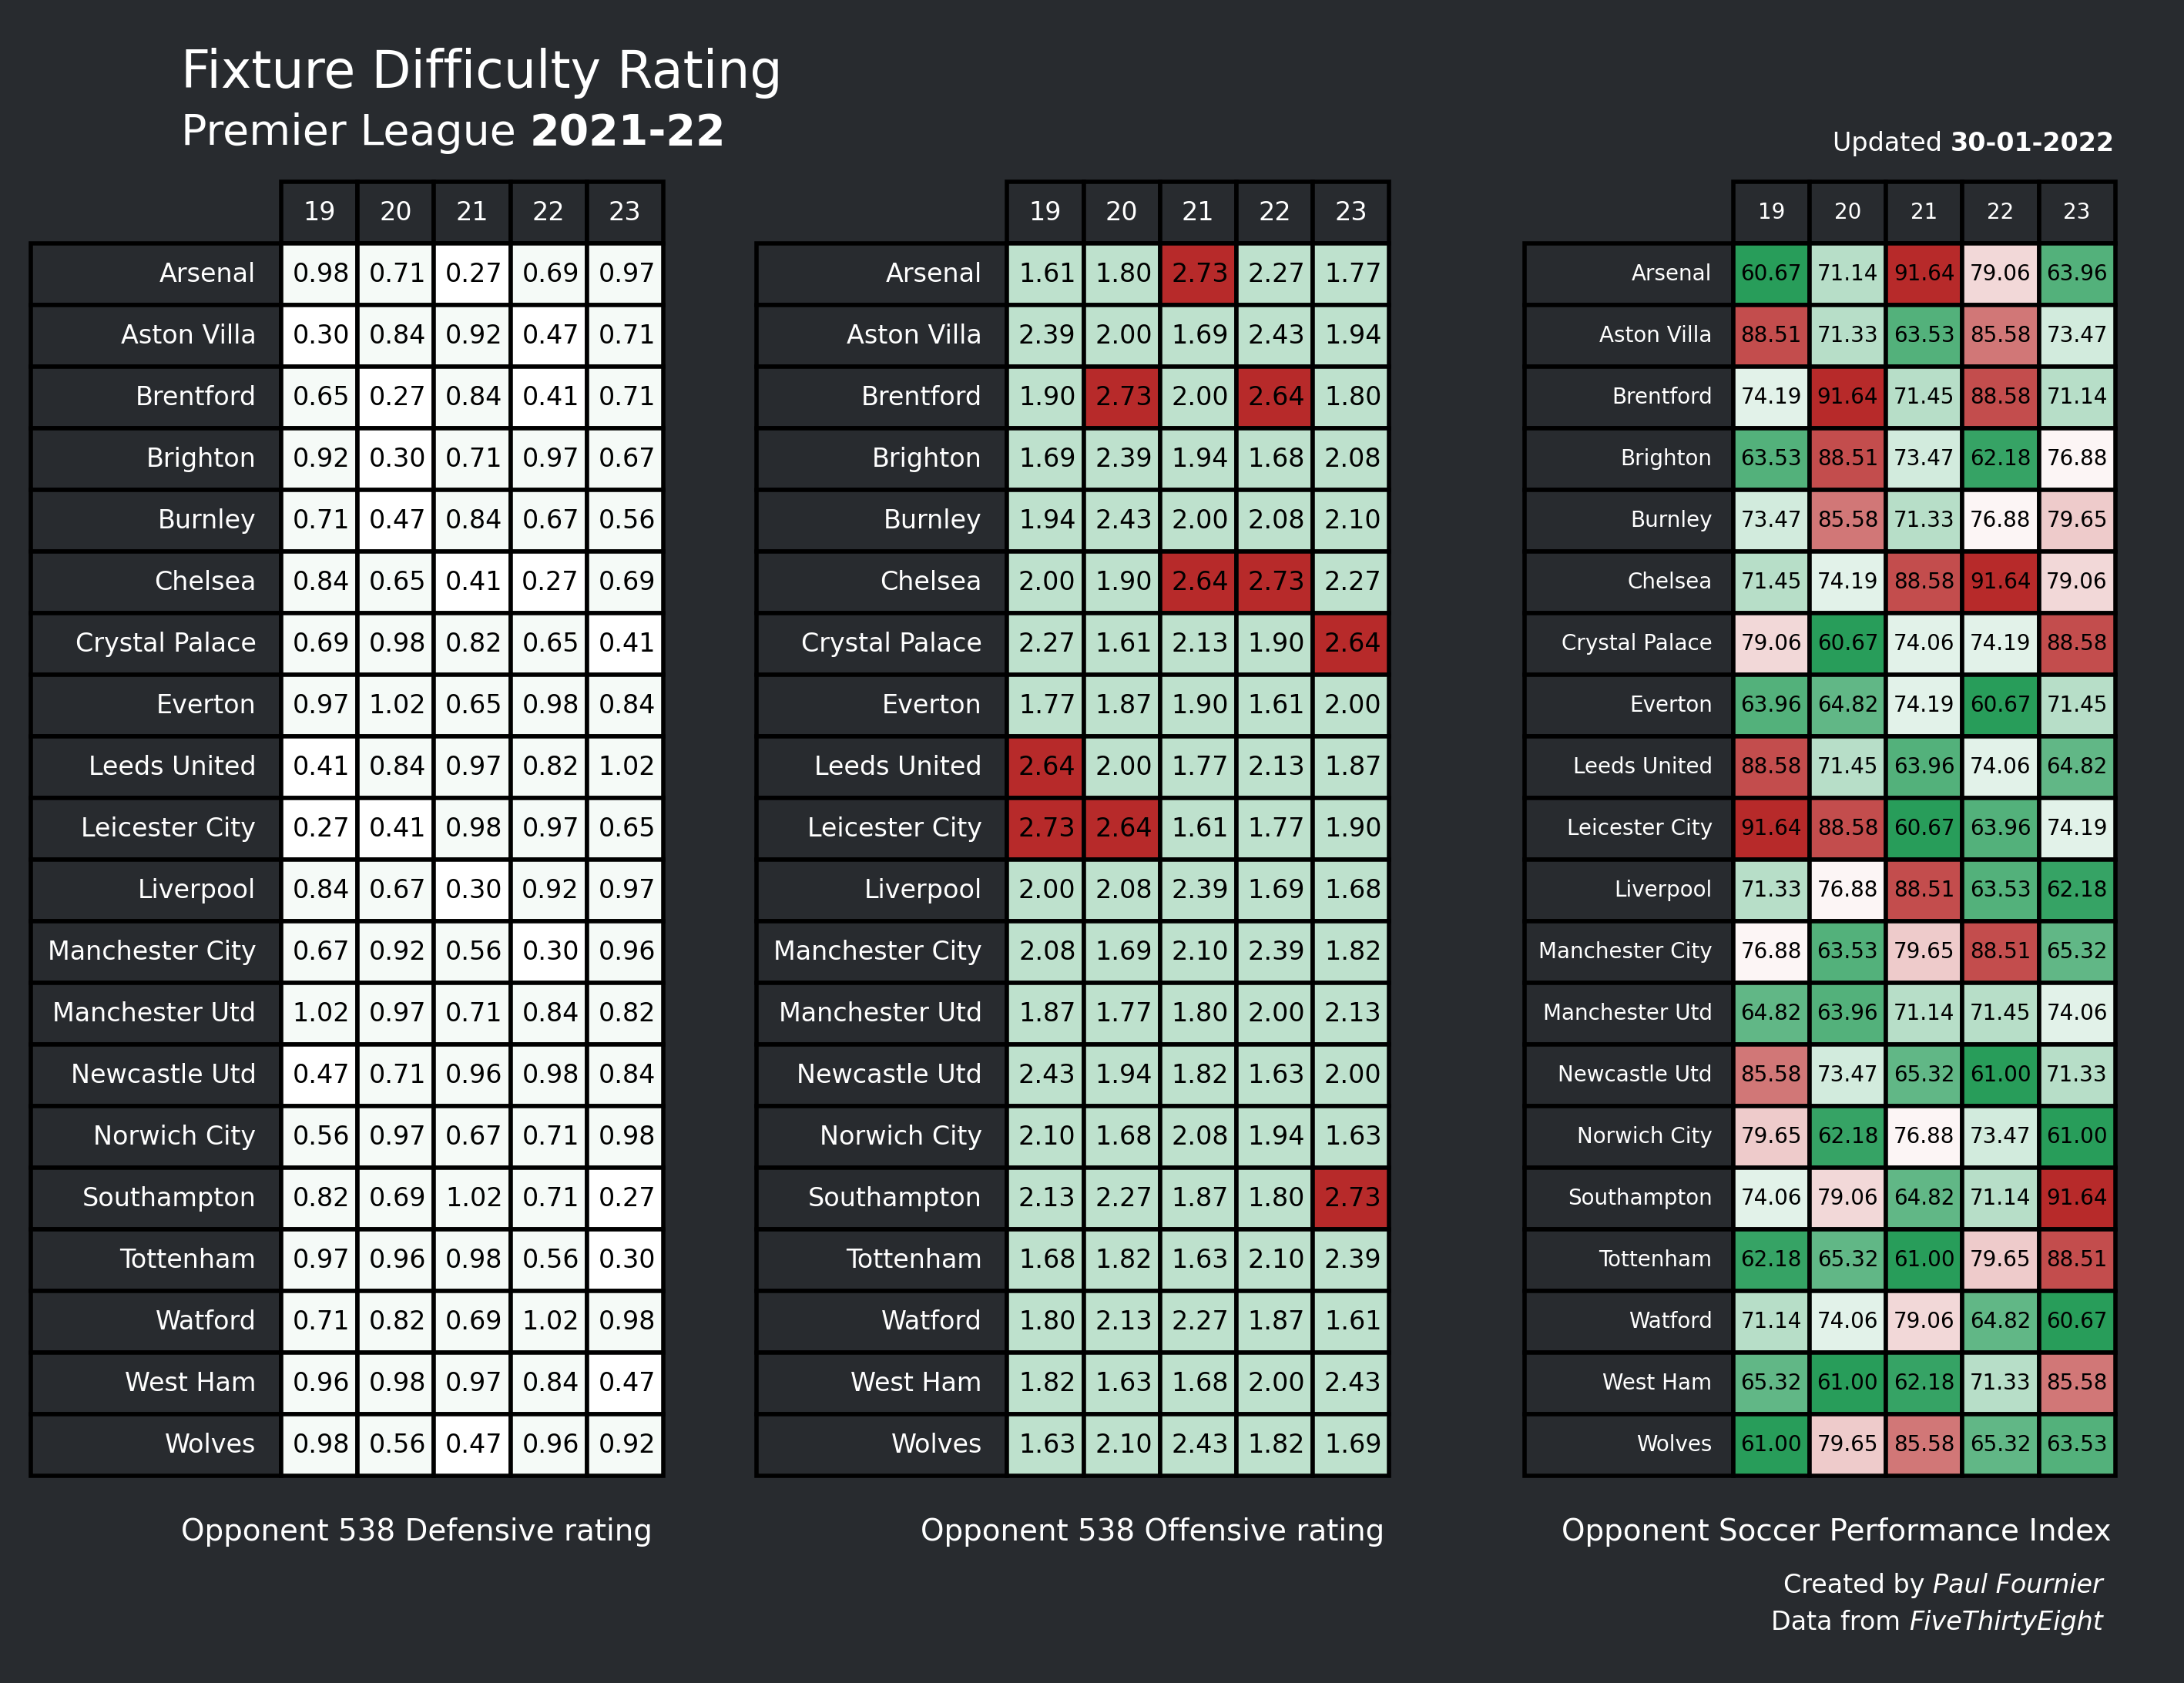

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

column_headers = table_spi.columns
row_headers = table_spi.index

background_rgb = [40/255, 43/255, 47/255, 1]
ccolors = np.repeat([background_rgb], len(column_headers), 0)
rcolors = np.repeat([background_rgb], len(row_headers), 0)

cell_text = []
for row in table_def.values:
    cell_text.append([f'{x:1.2f}' for x in row])

norm = plt.Normalize(table_def.values.min(), table_def.values.max())
table_def = table_def.astype('float32')
colours = red2green(norm(np.around(table_def.values)))

the_table = ax.table(
    cellText=cell_text,
    cellColours=colours,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center left',
    colWidths=[.04]*20,
    fontsize=12,
    )
the_table.scale(1, 1.2)

for i in range(1, 21):
    for j in range(0, 5):
        the_table[(i, j)].get_text().set_color('black')

cell_text = []
for row in table_off.values:
    cell_text.append([f'{x:1.2f}' for x in row])

norm = plt.Normalize(table_off.values.min(), table_off.values.max())
table_off = table_off.astype('float32')
colours = green2red(norm(np.around(table_off.values)))

the_table = ax.table(
    cellText=cell_text,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center',
    colWidths=[.04]*20,
    fontsize=12,
    cellColours=colours
    )
the_table.scale(1, 1.2)

for i in range(1, 21):
    for j in range(0, 5):
        the_table[(i, j)].get_text().set_color('black')

cell_text = []
for row in table_spi.values:
    cell_text.append([f'{x:1.2f}' for x in row])

norm = plt.Normalize(table_spi.values.min(), table_spi.values.max())
table_spi = table_spi.astype('float32')
colours = green2red(norm(np.around(table_spi.values)))

the_table = ax.table(
    cellText=cell_text,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center right',
    colWidths=[.04]*20,
    fontsize=12,
    cellColours=colours
    )
the_table.scale(1, 1.2)

for i in range(1, 21):
    for j in range(0, 5):
        the_table[(i, j)].get_text().set_color('black')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

fig_text(
    x=0.1, y=0.13,
    s="Opponent 538 Defensive rating",
    fontsize=7, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.4, y=0.13,
    s="Opponent 538 Offensive rating",
    fontsize=7, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.66, y=0.13,
    s="Opponent Soccer Performance Index",
    fontsize=7, fontfamily=watermark_font, color=text_color)

fig_text(
    x=0.1, y=0.925,
    s="Fixture Difficulty Rating",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=0.89,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.77, y=0.88,
    s="Updated <30-01-2022>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.75, y=0.1,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

fig_text(
    x=0.745, y=0.08,
    s="Data from <FiveThirtyEight>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()